In [2]:
# load the data, from cache if possible otherwise download!
from get_data import load_pickle
df = load_pickle()
df.dropna(inplace=True)
# print(df)

Loading cached data.pkl file. . .
Loaded pickle!


In [43]:
# filter for bus, train and tram (1, 4 and 5 respectively)
print('Filtering by transport type. . .')
print('Filtering bus. . .')
bus = df[df['NUM_MODE_TRANSPORT'] == 1].drop(columns=['NUM_MODE_TRANSPORT']).reset_index(drop=True)
print('Filtering tram. . .')
tram = df[df['NUM_MODE_TRANSPORT'] == 4].drop(columns=['NUM_MODE_TRANSPORT']).reset_index(drop=True)
print('Filtering train. . .')
train = df[df['NUM_MODE_TRANSPORT'] == 5].drop(columns=['NUM_MODE_TRANSPORT']).reset_index(drop=True)
print('done!')

Filtering by transport type. . .
Filtering bus. . .
Filtering tram. . .
Filtering train. . .
done!


In [46]:
import pandas as pd
import numpy as np

# groups: year, year-month and year-month-route
train['YEAR'] = train['VALIDATION_DATE'].dt.year
train['MONTH'] = train['VALIDATION_DATE'].dt.month

# year = [train['VALIDATION_DATE'].dt.year]
# year_month = [train['VALIDATION_DATE'].dt.year, train['VALIDATION_DATE'].dt.month]
# year_month_route = [train['VALIDATION_DATE'].dt.year, train['VALIDATION_DATE'].dt.month, train['ROUTE_CODE']]

year = [train['YEAR']]
year_month = [train['YEAR'], train['MONTH']]
year_month_route = [train['YEAR'], train['MONTH'], train['ROUTE_CODE']]

# group by year, year-month and year-month-route
year = train.groupby(by=year, as_index=False).sum()
year_month = train.groupby(by=year_month, as_index=False).sum()
year_month_route = train.groupby(by=year_month_route, as_index=False).sum()

# check out groupings
print(year, '\n\n')
print(year_month, '\n\n')
print(year_month_route, '\n\n')

   YEAR  ROUTE_DIRECTION  MEDIUM_TYPE  BAND_BOARDINGS_FLOOR    MONTH
0  2015            69886      91742.0               5009130   426254
1  2016           268973     350166.0              20187566  1154064
2  2017           238228     307991.0              19643688   986217
3  2018           287299     362585.0              20459850  1234741
4  2019           295854     371851.0              24471895  1256822
5  2020           198814    5328924.0               8275883   927712
6  2021           137528    3770841.0               6828119   488215 


    YEAR  MONTH  ROUTE_DIRECTION  MEDIUM_TYPE  BAND_BOARDINGS_FLOOR
0   2015      1             2117       2768.0                150023
1   2015      2             2608       3404.0                207691
2   2015      3             2309       3044.0                173991
3   2015      4             2273       2969.0                162354
4   2015      5             1993       2621.0                117852
..   ...    ...              ...     

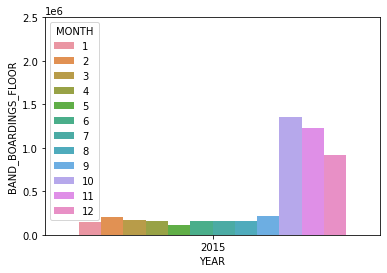

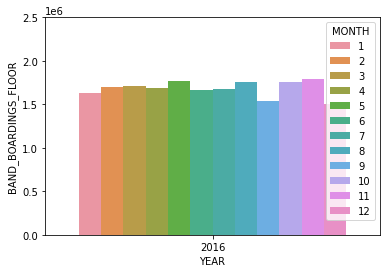

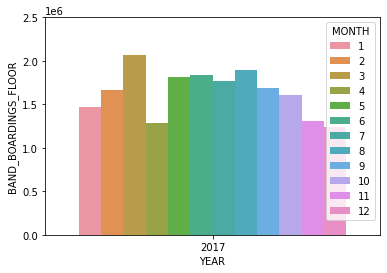

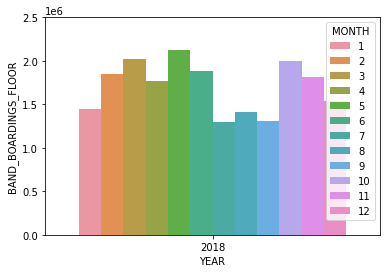

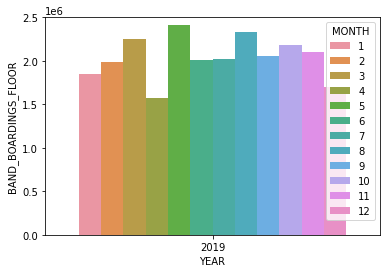

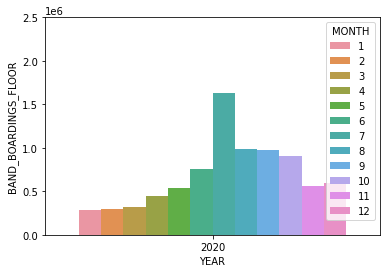

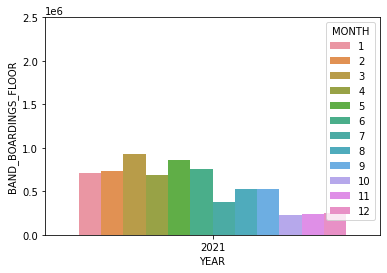

<Figure size 432x288 with 0 Axes>

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

for year in year_month['YEAR'].unique():
    ax = sns.barplot(data=year_month[year_month['YEAR'] == year], y='BAND_BOARDINGS_FLOOR', x='YEAR', hue='MONTH')
    ax.set(ylim=(0, 2_500_000))
    plt.savefig(os.path.join('plots', f'by_year_{year}.svg'))
    plt.show()
    plt.clf()

# sns.barplot(data=year_month[np.logical_or(year_month['YEAR'] == 2020, year_month['YEAR'] == 2019)], y='BAND_BOARDINGS_FLOOR', x='YEAR', hue='MONTH')
